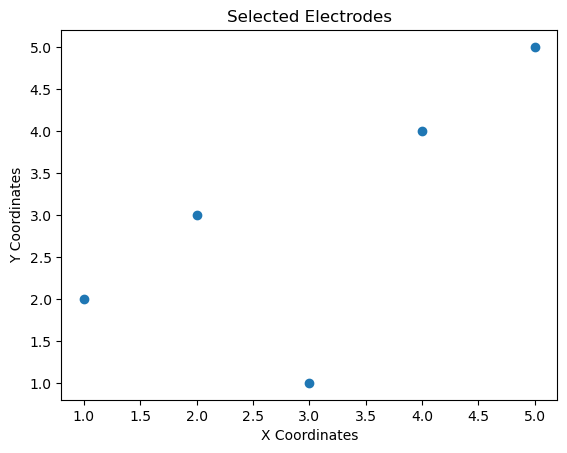

In [3]:
import matplotlib.pyplot as plt

class ElectrodeSelector:
    def __init__(self, electrode_data):
        self.electrode_data = electrode_data
        self.selected_indices = []

    def on_pick(self, event):
        index = event.ind
        if index and index[0] < len(self.electrode_data['x']):
            if index[0] not in self.selected_indices:
                self.selected_indices.append(index[0])
            else:
                self.selected_indices.remove(index[0])

            self.update_plot()

    def update_plot(self):
        self.ax.clear()

        # Plot all electrodes
        self.ax.scatter(self.electrode_data['x'], self.electrode_data['y'], picker=True)

        # Highlight selected electrodes
        selected_x = [self.electrode_data['x'][i] for i in self.selected_indices]
        selected_y = [self.electrode_data['y'][i] for i in self.selected_indices]
        self.ax.scatter(selected_x, selected_y, color='red', marker='o')

        # Add annotations for selected electrodes
        for i in self.selected_indices:
            self.ax.annotate(str(i), (self.electrode_data['x'][i], self.electrode_data['y'][i]))

        self.ax.set_title('Selected Electrodes')
        self.ax.set_xlabel('X Coordinates')
        self.ax.set_ylabel('Y Coordinates')

        plt.draw()

    def run(self):
        fig, self.ax = plt.subplots()
        fig.canvas.mpl_connect('pick_event', self.on_pick)
        self.update_plot()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Replace this with your actual electrode data from the JSON file
    electrode_data = {'x': [1, 2, 3, 4, 5], 'y': [2, 3, 1, 4, 5]}

    selector = ElectrodeSelector(electrode_data)
    selector.run()


NameError: name 'line_picker' is not defined

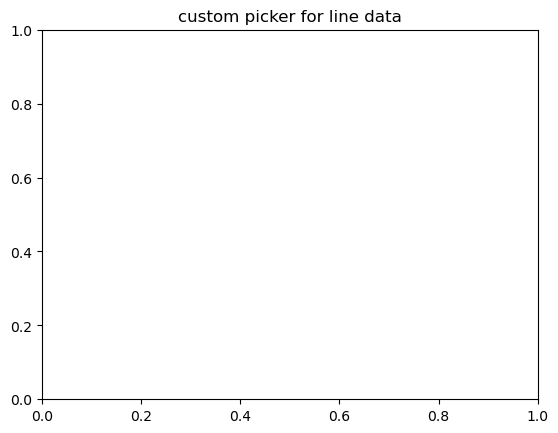

In [7]:
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('custom picker for line data')
line, = ax1.plot(np.random.rand(100), np.random.rand(100), 'o', picker=line_picker)
fig.canvas.mpl_connect('pick_event', onpick2)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand

%matplotlib notebook

from matplotlib.image import AxesImage
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('click on points, rectangles or text', picker=True)
ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
line, = ax1.plot(np.random.rand(100), 'o', picker=True, pickradius=5)

# Pick the rectangle.
ax2.bar(range(10), np.random.rand(10), picker=True)
for label in ax2.get_xticklabels():  # Make the xtick labels pickable.
    label.set_picker(True)


def onpick1(event):
    if isinstance(event.artist, Line2D):
        thisline = event.artist
        xdata = thisline.get_xdata()
        ydata = thisline.get_ydata()
        ind = event.ind
        print('onpick1 line:', np.column_stack([xdata[ind], ydata[ind]]))
    elif isinstance(event.artist, Rectangle):
        patch = event.artist
        print('onpick1 patch:', patch.get_path())
    elif isinstance(event.artist, Text):
        text = event.artist
        print('onpick1 text:', text.get_text())


fig.canvas.mpl_connect('pick_event', onpick1)

<IPython.core.display.Javascript object>

15